In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [5]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop the 'id' column as it is not a feature
df_standardize = df.drop('id', axis=1)

# Encode the diagnosis column
label_encoder = LabelEncoder()
df_standardize['diagnosis'] = label_encoder.fit_transform(df_standardize['diagnosis'])

# Separate features (X) and target (y)
X = df_standardize.drop('diagnosis', axis=1)
y = df_standardize['diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier viewing (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled_df.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [7]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled_df,y,test_size=0.2,random_state=42)


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(x_train, y_train)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(x_train, y_train)

SVC(random_state=42)

In [9]:
# Evaluate SVM with linear kernel
y_pred_linear = svm_linear.predict(x_test)
print("--- Evaluation for SVM with Linear Kernel ---")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

# Evaluate SVM with RBF kernel
y_pred_rbf = svm_rbf.predict(x_test)
print("\n--- Evaluation for SVM with RBF Kernel ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

--- Evaluation for SVM with Linear Kernel ---
Accuracy: 0.956140350877193
Confusion Matrix:
 [[68  3]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


--- Evaluation for SVM with RBF Kernel ---
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Task
Visualize the decision boundary of an SVM model trained on a binary classification dataset using 2D data.

## Select or reduce features

### Subtask:
Choose two relevant features from the dataset or use a dimensionality reduction technique like PCA to reduce the data to 2 dimensions.


**Reasoning**:
The subtask requires reducing the feature data to 2 dimensions using PCA. The steps involve importing PCA, instantiating it, fitting and transforming the scaled data, and creating a DataFrame from the result. These steps can be combined into a single code block.



In [10]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA to the scaled features
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame from the PCA-transformed data
X_pca_df = pd.DataFrame(X_pca, columns=['principal_component_1', 'principal_component_2'])

# Display the first few rows of the PCA DataFrame
display(X_pca_df.head())

,principal_component_1,principal_component_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


## Train models on 2d data

### Subtask:
Train the SVM models (linear and RBF) using only the selected or reduced 2D data.


**Reasoning**:
Train linear and RBF SVM models using the 2D PCA-transformed data.



In [11]:
from sklearn.svm import SVC

# Train SVM with linear kernel on PCA data
svm_linear_pca = SVC(kernel='linear', random_state=42)
svm_linear_pca.fit(X_pca_df, y)

# Train SVM with RBF kernel on PCA data
svm_rbf_pca = SVC(kernel='rbf', random_state=42)
svm_rbf_pca.fit(X_pca_df, y)

SVC(random_state=42)

## Visualize decision boundary

### Subtask:
Create plots to visualize the decision boundary of the trained SVM models on the 2D data.


**Reasoning**:
Create a meshgrid, predict the class for each point in the meshgrid using the trained SVM models, and then create contour and scatter plots to visualize the decision boundaries for both linear and RBF kernels.



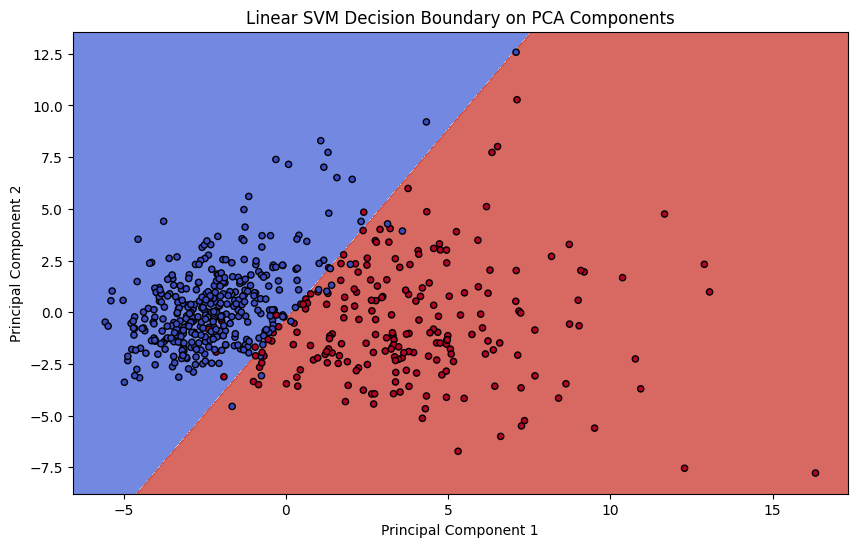

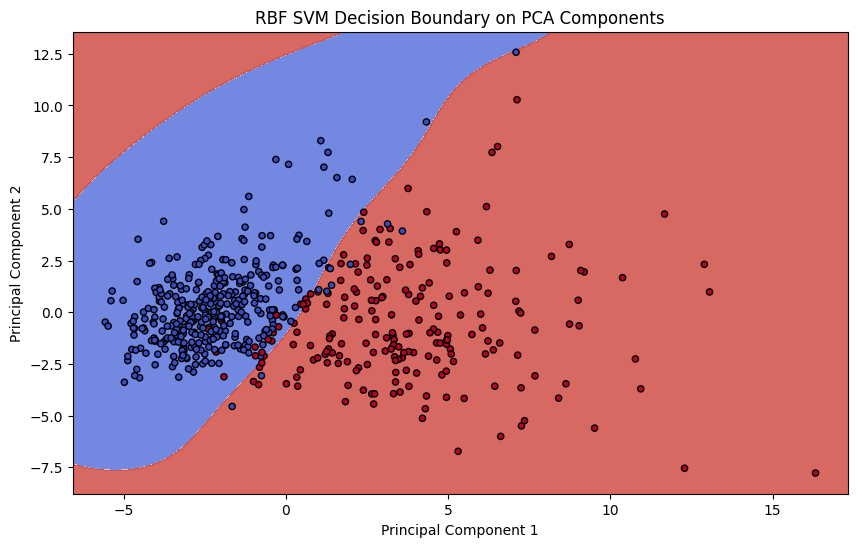

In [12]:
# Create a meshgrid
x_min, x_max = X_pca_df['principal_component_1'].min() - 1, X_pca_df['principal_component_1'].max() + 1
y_min, y_max = X_pca_df['principal_component_2'].min() - 1, X_pca_df['principal_component_2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid for linear SVM
Z_linear = svm_linear_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

# Predict class for each point in the meshgrid for RBF SVM
Z_rbf = svm_rbf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Create plot for linear SVM decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_pca_df['principal_component_1'], X_pca_df['principal_component_2'], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title("Linear SVM Decision Boundary on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Create plot for RBF SVM decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_pca_df['principal_component_1'], X_pca_df['principal_component_2'], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title("RBF SVM Decision Boundary on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Display the plots
plt.show()

## Summary:

### Data Analysis Key Findings

*   The feature data was successfully reduced to two principal components using PCA.
*   Both linear and RBF kernel SVM models were successfully trained on the 2D PCA-transformed data.
*   Decision boundaries for both the linear and RBF SVM models were visualized using contour plots on the 2D principal components.
*   The plots show the separation of data points based on the learned decision boundaries for each kernel.

### Insights or Next Steps

*   Comparing the decision boundaries of the linear and RBF kernels on the 2D PCA data provides a visual understanding of how these kernels handle linear and non-linear separation.
*   Further analysis could involve evaluating the performance of these models on a test set to quantify how well the decision boundaries generalize.


# Task
Tune hyperparameters for linear and RBF kernel SVM models using grid search and cross-validation, and evaluate the performance of the best models.

## Define parameter grid

### Subtask:
Define the hyperparameters and their possible values to search over for both linear and RBF SVMs.


**Reasoning**:
Define the hyperparameter grids for linear and RBF SVM models as dictionaries.



In [13]:
# Define hyperparameter grid for linear SVM
param_grid_linear = {'C': [0.1, 1, 10, 100]}

# Define hyperparameter grid for RBF SVM
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

print("Linear SVM Parameter Grid:", param_grid_linear)
print("RBF SVM Parameter Grid:", param_grid_rbf)

Linear SVM Parameter Grid: {'C': [0.1, 1, 10, 100]}
RBF SVM Parameter Grid: {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}


## Perform grid search with cross-validation

### Subtask:
Use GridSearchCV to find the best hyperparameters for each SVM model using cross-validation on the training data.


**Reasoning**:
Use GridSearchCV to find the best hyperparameters for both linear and RBF SVM models using cross-validation on the training data and print the best parameters.



In [14]:
from sklearn.model_selection import GridSearchCV

# Instantiate a SVC model for the linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

# Instantiate a GridSearchCV object for the linear SVM
grid_search_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5)

# Fit the linear GridSearchCV object to the training data
grid_search_linear.fit(x_train, y_train)

# Instantiate a SVC model for the RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Instantiate a GridSearchCV object for the RBF SVM
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5)

# Fit the RBF GridSearchCV object to the training data
grid_search_rbf.fit(x_train, y_train)

# Print the best parameters found for both the linear and RBF SVM models
print("Best parameters for Linear SVM:", grid_search_linear.best_params_)
print("Best parameters for RBF SVM:", grid_search_rbf.best_params_)

Best parameters for Linear SVM: {'C': 0.1}
Best parameters for RBF SVM: {'C': 10, 'gamma': 0.01}


## Evaluate best models

### Subtask:
Evaluate the performance of the SVM models with the best hyperparameters on the test data.


**Reasoning**:
Evaluate the performance of the best linear and RBF SVM models on the test data by calculating and printing the accuracy, confusion matrix, and classification report for each model.



In [15]:
# Get the best linear SVM model
best_linear_svm = grid_search_linear.best_estimator_

# Evaluate the best linear SVM model on the test data
y_pred_linear_tuned = best_linear_svm.predict(x_test)
print("--- Evaluation for Tuned Linear SVM ---")
print("Accuracy:", accuracy_score(y_test, y_pred_linear_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_linear_tuned))

# Get the best RBF SVM model
best_rbf_svm = grid_search_rbf.best_estimator_

# Evaluate the best RBF SVM model on the test data
y_pred_rbf_tuned = best_rbf_svm.predict(x_test)
print("\n--- Evaluation for Tuned RBF SVM ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf_tuned))

--- Evaluation for Tuned Linear SVM ---
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[71  0]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


--- Evaluation for Tuned RBF SVM ---
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[71  0]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found for the linear SVM were `{'C': 0.1}`.
*   The best hyperparameters found for the RBF SVM were `{'C': 10, 'gamma': 0.01}`.
*   The tuned linear SVM model achieved an accuracy of approximately 0.9825 on the test data.
*   The tuned RBF SVM model also achieved an accuracy of approximately 0.9825 on the test data.
*   Both tuned models exhibited identical confusion matrices with 71 true negatives, 41 true positives, 2 false negatives, and 0 false positives.

### Insights or Next Steps

*   Since both tuned models performed similarly on the test data, further analysis could involve evaluating other performance metrics or considering model complexity for deployment.
*   Given the identical performance, exploring simpler models or investigating if the RBF kernel provides benefits on a different dataset or with a wider range of hyperparameters could be valuable.


 **1.What is a support vector?**
 Support vectors are the data points that lie closest to the decision boundary (hyperplane). They are the most difficult points to classify and play a crucial role in defining the hyperplane. If you remove the support vectors, the hyperplane might change.

 **2.What does the C parameter do?**
 The C parameter in SVM is a regularization parameter. It controls the trade-off between achieving a low training error and a low testing error (generalization ability).
A small C creates a wider margin but allows more misclassifications on the training data (higher bias, lower variance).
A large C creates a narrower margin but aims to classify all training points correctly (lower bias, higher variance).

 **3.What are kernels in SVM?**
  Kernels are functions that take data as input and transform it into the required form. In SVM, kernels are used to transform the input data into a higher-dimensional space where it might be possible to find a linear hyperplane to separate the classes, even if the data is not linearly separable in the original space. This is known as the "kernel trick."

 **4.What is the difference between linear and RBF kernel?**
 Linear Kernel: This is the simplest kernel. It is used when the data is linearly separable. The decision boundary is a straight line (in 2D) or a hyperplane (in higher dimensions).
RBF (Radial Basis Function) Kernel: This is a non-linear kernel. It maps the data into an infinite-dimensional space. It is suitable for data that is not linearly separable. The decision boundary can be non-linear and more complex.

 **5.What are the advantages of SVM?**
 Effective in high-dimensional spaces.
Effective in cases where the number of dimensions is greater than the number of samples.
Uses a subset of training points (support vectors) in the decision function, making it memory efficient.
Versatile: Different kernel functions can be specified for the decision function.

 **6.Can SVMs be used for regression?**
 Yes, SVMs can be extended to solve regression problems, known as Support Vector Regression (SVR). Instead of finding a hyperplane that separates classes, SVR finds a hyperplane that best fits the training data while minimizing the error within a certain margin.

 **7.What happens when data is not linearly separable?**
 When data is not linearly separable, a linear SVM will not be able to find a straight line or hyperplane to perfectly separate the classes. In such cases, you can use a non-linear kernel (like the RBF kernel) to map the data into a higher-dimensional space where it might become linearly separable, or use a "soft margin" SVM (controlled by the C parameter) which allows for some misclassifications.

 **8.How is overfitting handled in SVM?**
  Overfitting in SVM can be handled by:
Regularization (C parameter): A smaller C value increases the regularization, creating a wider margin and reducing the risk of overfitting.
Kernel Choice: Choosing an appropriate kernel for the data can help prevent overfitting.
Cross-validation: Using techniques like cross-validation during training and hyperparameter tuning helps to estimate the model's performance on unseen data and identify overfitting.